In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 12.10 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


In [73]:
import re
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### 1. Data Exploration

#### 1.1) Loading the Dataset

In [3]:
df = pd.read_csv('/content/datasets/Job Postings/jobs.csv.zip')
df.head(2)

,job_id,job_role,company,experience,salary,location,rating,reviews,resposibilities,posted_on,job_link,company_link
0,7.012301e+10,Branch Banking - Calling For Women Candidates,Hdfc Bank,1-6 Yrs,Not disclosed,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",4.0,39110 Reviews,"Customer Service,Sales,Relationship Management",1 Day Ago,https://www.naukri.com/job-listings-branch-ban...,https://www.naukri.com/hdfc-bank-jobs-careers-213
1,6.012391e+10,Product Owner Senior Manager,Accenture,11-15 Yrs,Not disclosed,"Kolkata, Mumbai, Hyderabad/Secunderabad, Pune,...",4.1,32129 Reviews,"Product management,Market analysis,Change mana...",1 Day Ago,https://www.naukri.com/job-listings-product-ow...,https://www.naukri.com/accenture-jobs-careers-...


#### 1.2) Removing "posted_on" Columns

In [4]:
del df['posted_on']

#### 1.3) Check Null Values

In [5]:
df.isnull().sum()

,0
job_id,480
job_role,480
company,481
experience,1749
salary,480
location,1706
rating,36199
reviews,36199
resposibilities,500
job_link,480


#### 1.4) Removign rows with null values in job_id,company and responsibility column

In [6]:
df.dropna(subset = ['job_id','company','resposibilities'], inplace = True)

#### 1.5) Filling Null values in location and experience column with most frequent

In [7]:
df['location'].fillna(df['location'].mode()[0], inplace = True)
df['experience'].fillna(df['experience'].mode()[0], inplace = True)

<ipython-input-7-2a1fddb959e7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna(df['location'].mode()[0], inplace = True)
<ipython-input-7-2a1fddb959e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

#### 1.6) Filling Null values in rating and reviews column with 0

In [8]:
df['rating'].fillna(0.0,inplace = True)
df['reviews'].fillna('0 Reviews',inplace = True)

<ipython-input-8-96e8ba36cda5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(0.0,inplace = True)
<ipython-input-8-96e8ba36cda5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [9]:
df.isnull().sum()

,0
job_id,0
job_role,0
company,0
experience,0
salary,0
location,0
rating,0
reviews,0
resposibilities,0
job_link,0


#### 1.7) Remove Duplicates

In [10]:
df.drop_duplicates(subset=['job_link'],inplace = True)

### 2. Data Cleaning

#### 2.1) Cleaning Job_id Column

In [11]:
df['job_id'] = df['job_id'].astype('int').astype('str')

#### 2.2) Creating Company ID Column

In [12]:
df['company_id'] = df['company_link'].str.split('-').str[-1]

#### 2.3) Removing Companies with company_id = 0

In [13]:
df = df[df['company_id'] != '0']

#### 2.4) Cleaning Experience Column

In [14]:
df['start_exp'] = df['experience'].str.replace('Yrs','').str.strip().str.split('-').str[0].astype('int')
df['end_exp'] = df['experience'].str.replace('Yrs','').str.strip().str.split('-').str[1].astype('int')

<ipython-input-14-838dbf468192>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_exp'] = df['experience'].str.replace('Yrs','').str.strip().str.split('-').str[0].astype('int')


#### 2.5) Cleaning Salary Column

###### 2.5.1 Removing Categories like gradudate etc

In [15]:
salary_clean = []

for i in df['salary']:
  if bool(re.search(r'\d', i)) == False or 'Cr' in i:
    salary_clean.append('Not disclosed')
  else:
    salary_clean.append(i)

df['salary_clean'] = salary_clean

###### 2.5.2 Splitting salaries

In [16]:
min_salaries = []
max_salaries = []

for i in df['salary_clean']:

  if i == 'Not disclosed':
    min_salary = 'Not disclosed'
    max_salary = 'Not disclosed'

  elif len(i.split('-')) == 2:
    min_salary = i.split('PA')[0].split('-')[0].strip().replace(',','')
    max_salary = i.split('PA')[0].split('-')[1].strip().replace(',','')


  elif len(i.split('-')) == 1:
    min_salary = ''.join(re.findall(r'\d', i.split('PA')[0]))
    max_salary = ''.join(re.findall(r'\d', i.split('PA')[0]))


  min_salaries.append(min_salary)
  max_salaries.append(max_salary)

df['min_salary'] = min_salaries
df['max_salary'] = max_salaries

###### 2.5.3 Clean further minimum and maximum salaries

In [17]:
df.loc[df['min_salary'] == 'Less than 5000', 'min_salary'] = '5000'
df.loc[df['min_salary'] == 'Less than 50000', 'min_salary'] = '50000'

#### 2.6) Cleaning Reviews Column

In [18]:
df['reviews'] = df['reviews'].str.split(' ').str[0].astype('int')

#### 2.7) Cleaning Location

In [19]:
df['location'].str.split(',').explode().str.lower().explode().nunique()

4777

### 3. Companies Analysis

#### 3.1) Top 20 Companies with maximum Job Openings

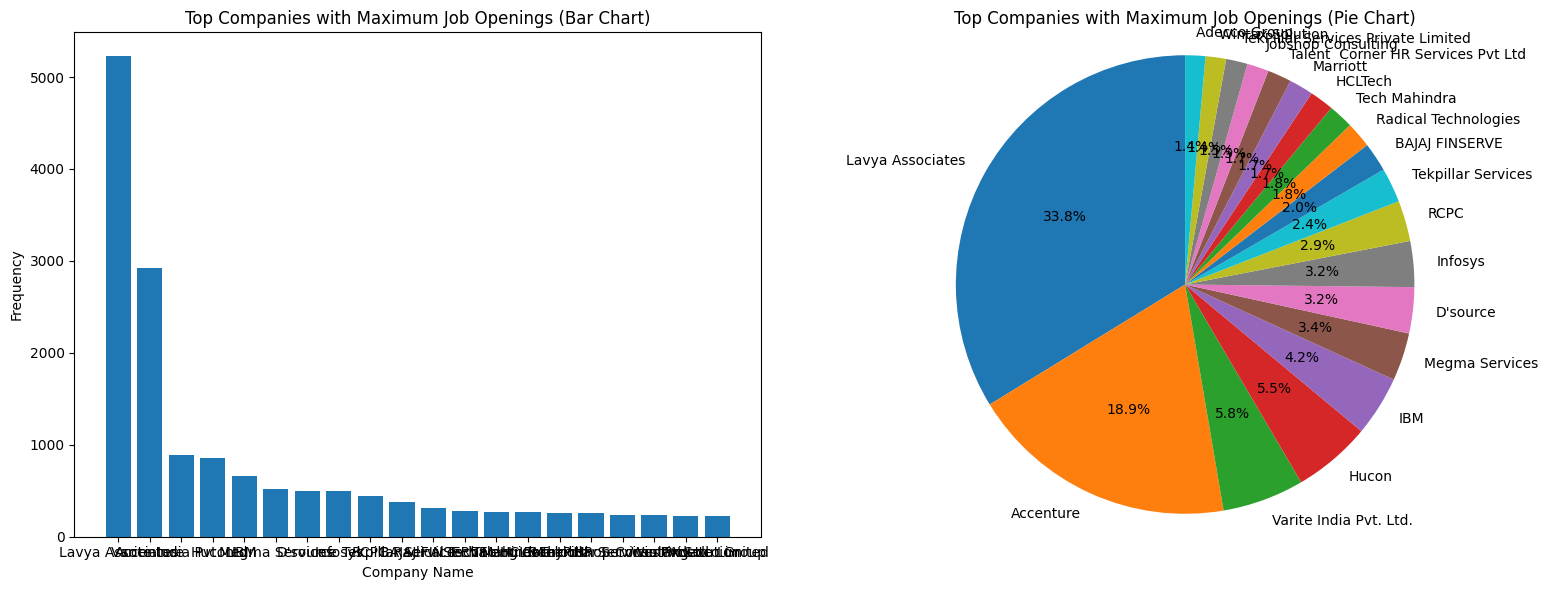

In [20]:
freq       = df['company_id'].value_counts().head(20).values
company_id = df['company_id'].value_counts().head(20).index

company_name = []

for i in company_id:
  company_name.append(df[df['company_id'] == i]['company'].value_counts().index[0])

data = {'company_name': company_name, 'company_id': company_id,'freq': freq}

company_df = pd.DataFrame(data)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Bar chart on the left
axes[0].bar(company_df['company_name'], company_df['freq'])
axes[0].set_xlabel("Company Name")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Top Companies with Maximum Job Openings (Bar Chart)")


# Pie chart on the right
axes[1].pie(company_df['freq'], labels=company_df['company_name'], autopct='%1.1f%%', startangle=90)
axes[1].set_title("Top Companies with Maximum Job Openings (Pie Chart)")
axes[1].axis('equal')  # Equal aspect ratio for the pie chart

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#### 3.2) Top 5 Company with Maximum Salary Variation

In [21]:
df_salary = df[df['min_salary'] != 'Not disclosed']

df_salary['max_salary'] = df_salary['max_salary'].astype('int')
df_salary['min_salary'] = df_salary['min_salary'].astype('int')


salary_range_df = pd.DataFrame({'max_salary': df_salary.groupby('company_id')['max_salary'].max(),
                                'min_salary': df_salary.groupby('company_id')['min_salary'].min()})


salary_range_df['salary_diff'] = salary_range_df['max_salary'] - salary_range_df['min_salary']

salary_range_df.sort_values(by = 'salary_diff', ascending = False).head(5)

company_id = salary_range_df.sort_values(by = 'salary_diff', ascending = False).head(5).index

company_name = []

for i in company_id:
  company_name.append(df_salary[df_salary['company_id'] == i]['company'].value_counts().index[0])

final_df = salary_range_df.sort_values(by = 'salary_diff', ascending = False).head(5)

final_df['company_name'] = company_name

rearranged_df = final_df[['company_name', 'min_salary', 'max_salary', 'salary_diff']]
rearranged_df

<ipython-input-21-965250b21e3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['max_salary'] = df_salary['max_salary'].astype('int')
<ipython-input-21-965250b21e3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['min_salary'] = df_salary['min_salary'].astype('int')


,company_name,min_salary,max_salary,salary_diff
company_id,,,,
1512600,Experis,50000,90000000,89950000
68313,Tata International,350000,90000000,89650000
6021346,DM Healthcare Llc,100000,85000000,84900000
4422386,Vision India Services,150000,80000000,79850000
123508647,Bhagat Hr Services,175000,80000000,79825000


#### 3.3) Top 5 Company hiring for most numbers of locations

In [22]:
company_ids = df['company_id'].unique()
freq = []


for company_id in tqdm(company_ids):
  freq.append([company_id,df[df['company_id']== company_id]['location'].str.split(',').explode().str.lower().explode().str.split('/').explode().str.split('-').explode().str.strip().nunique()])

freq_df = pd.DataFrame(freq, columns = ['company_id','freq'])

freq_df.sort_values(by = 'freq', ascending = False).head(5)

100%|██████████| 13790/13790 [02:43<00:00, 84.55it/s]


,company_id,freq
376,6379242,253
3501,123598343,247
1008,932996,241
10492,4570964,219
35,49075,171


#### 3.4) Rating Distribution as per Companies

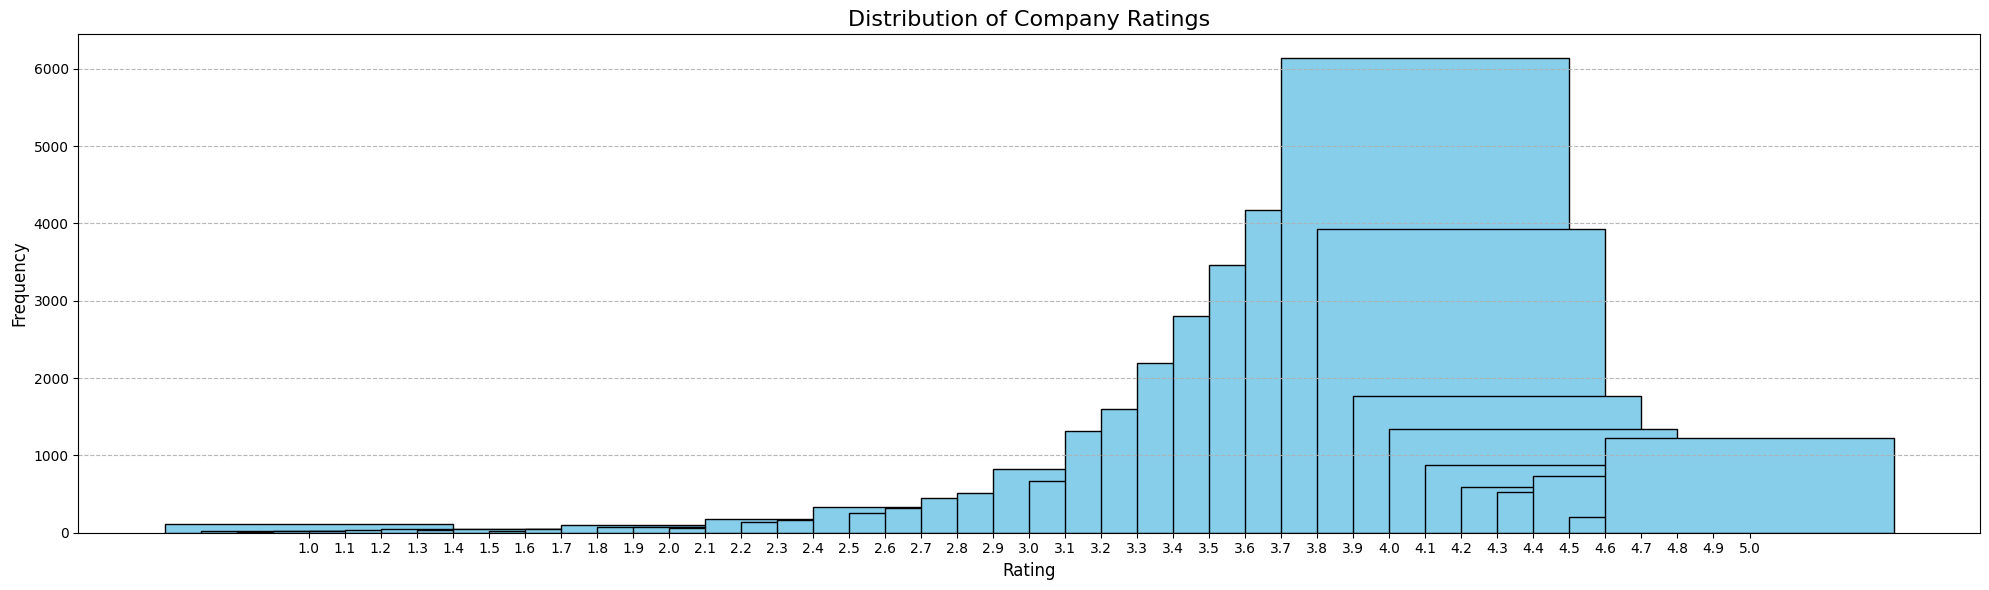

In [57]:
rating_counts = df[df['rating'] != 0.0]['rating'].value_counts().sort_index()

plt.figure(figsize=(20, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Company Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rating_counts.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

#### 3.5) Salary vs Experience of any Company

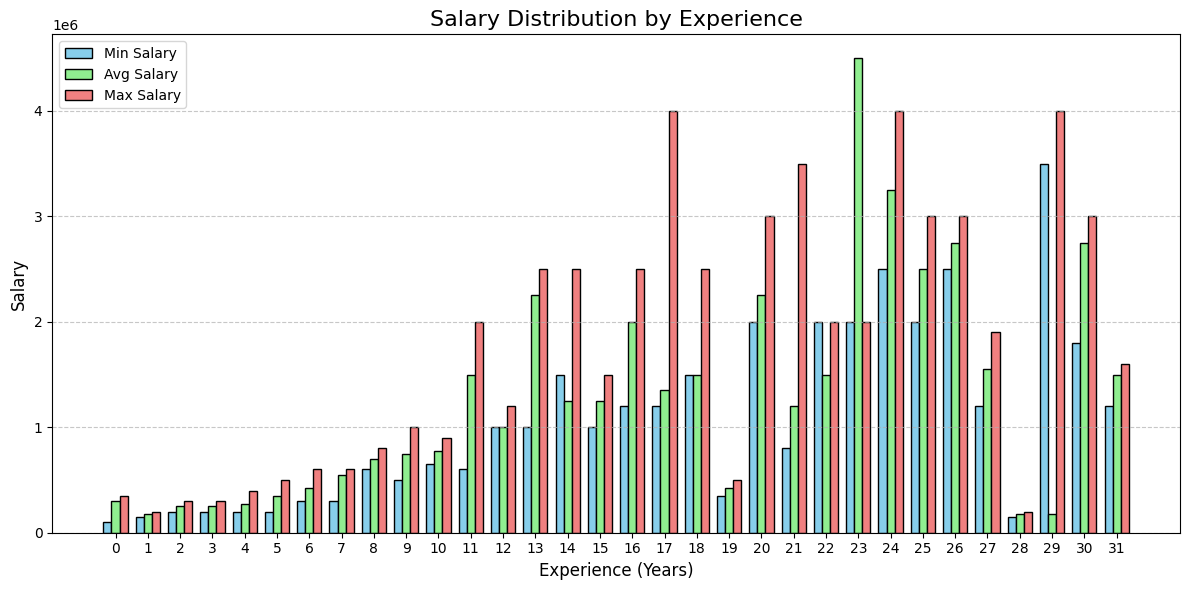

In [102]:
df_pr = df[df['max_salary'] != 'Not disclosed']

df_pr['min_salary'] = df_pr['min_salary'].astype(int)
df_pr['max_salary'] = df_pr['max_salary'].astype(int)

df_pr['avg_salary'] = ((df_pr['min_salary'] + df_pr['max_salary'])/2).astype(int)


lst = []

for i in np.sort(df_pr['end_exp'].unique()):
  lst.append([i,
              df_pr[df_pr['end_exp'] == i]['min_salary'].mode()[0],
              df_pr[df_pr['end_exp'] == i]['avg_salary'].mode()[0],
              df_pr[df_pr['end_exp'] == i]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()

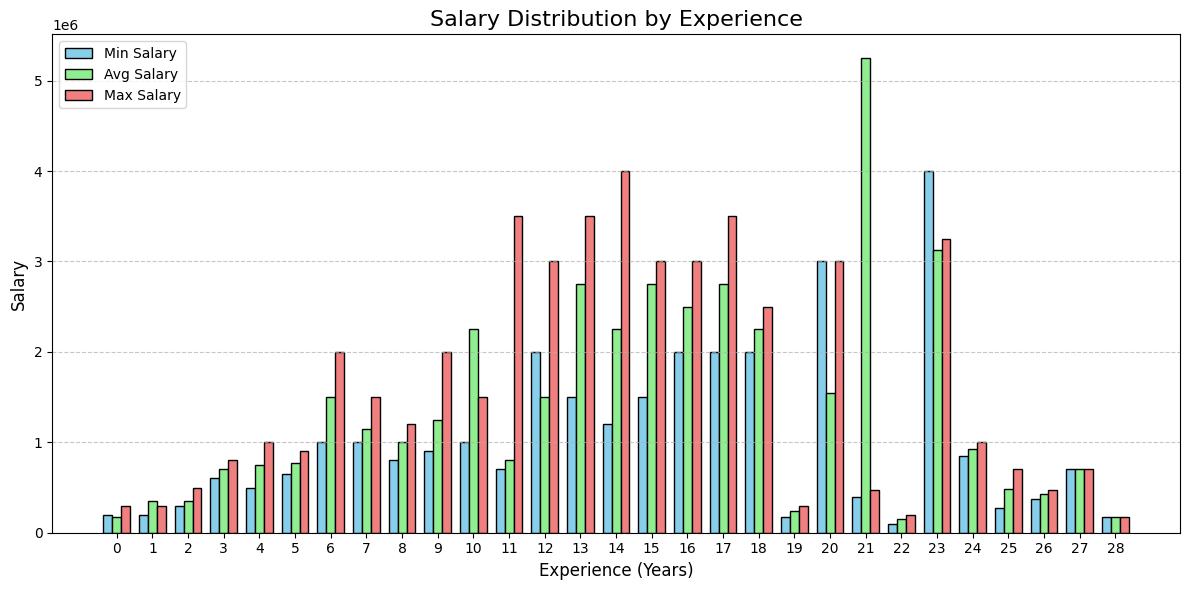

In [103]:
lst = []

for i in np.sort(df_pr['start_exp'].unique()):
  lst.append([i,
              df_pr[df_pr['start_exp'] == i]['min_salary'].mode()[0],
              df_pr[df_pr['start_exp'] == i]['avg_salary'].mode()[0],
              df_pr[df_pr['start_exp'] == i]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()


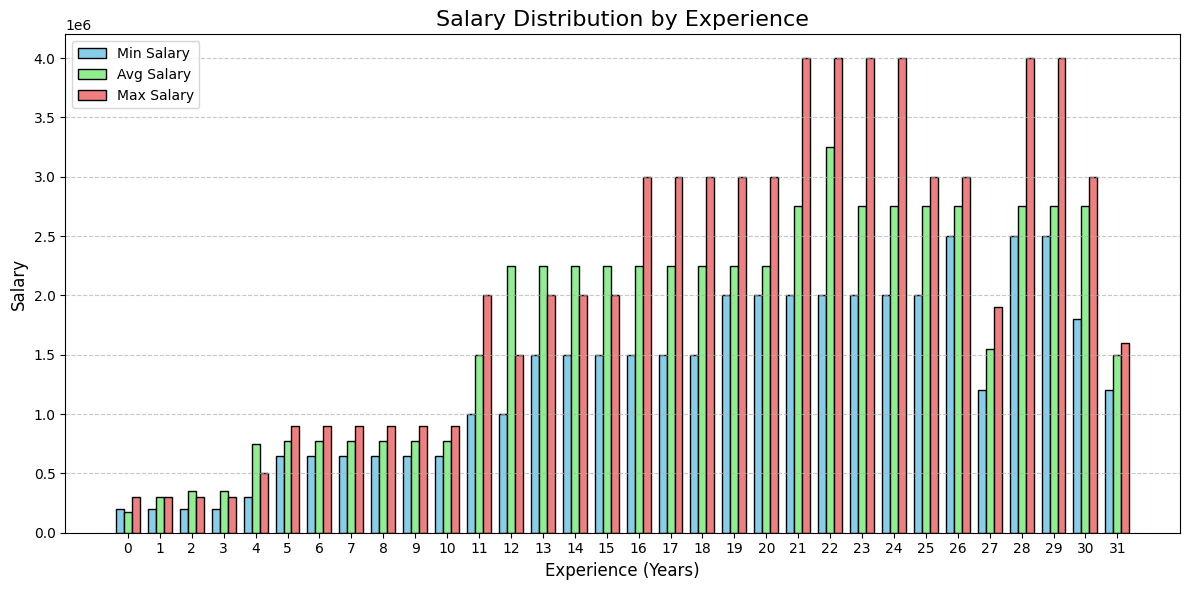

In [113]:
lst = []

for i in np.sort(df_pr['end_exp'].unique()):
  lst.append([i,
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['min_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['avg_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()



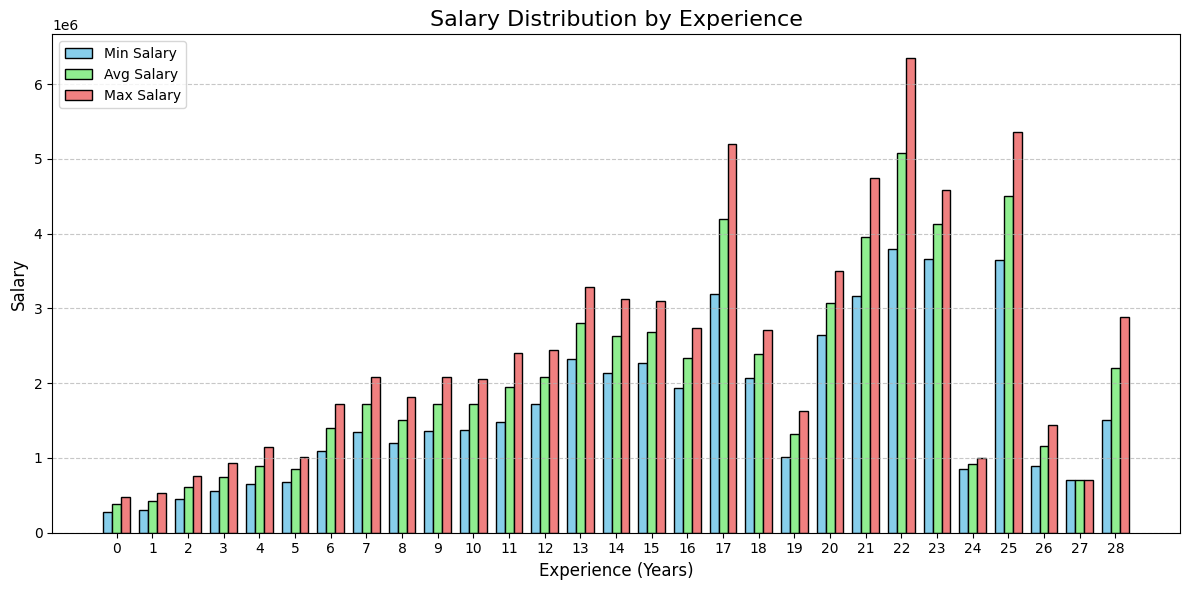

In [128]:
lst = []

for i in np.sort(df_pr['start_exp'].unique()):
  lst.append([i,
              df_pr[df_pr['start_exp'] == i]['min_salary'].mean(),
              df_pr[df_pr['start_exp'] == i]['avg_salary'].mean(),
              df_pr[df_pr['start_exp'] == i]['max_salary'].mean()])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]

# Set the width of the bars
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(r1, min_salary, color='skyblue', width=bar_width, edgecolor='black', label='Min Salary')
plt.bar(r2, avg_salary, color='lightgreen', width=bar_width, edgecolor='black', label='Avg Salary')
plt.bar(r3, max_salary, color='lightcoral', width=bar_width, edgecolor='black', label='Max Salary')

# Customize the plot
plt.title('Salary Distribution by Experience', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()


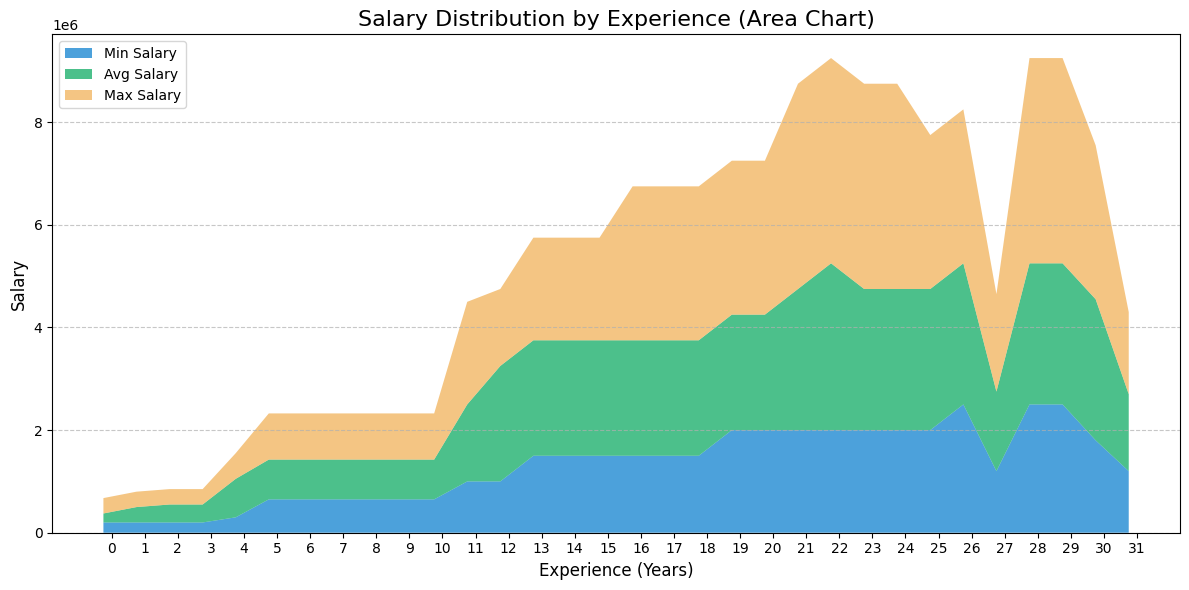

In [120]:
lst = []

for i in np.sort(df_pr['end_exp'].unique()):
  lst.append([i,
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['min_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['avg_salary'].mode()[0],
              df_pr[(i >= df_pr['start_exp'])  &  (i <= df_pr['end_exp'])]['max_salary'].mode()[0]])


experience = [item[0] for item in lst]
min_salary = [item[1] for item in lst]
avg_salary = [item[2] for item in lst]
max_salary = [item[3] for item in lst]
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(experience))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the area chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.stackplot(r1, min_salary, avg_salary, max_salary, alpha=0.7,
             colors=['#007acc', '#00a65a', '#f0ad4e'],
             labels=['Min Salary', 'Avg Salary', 'Max Salary'])

# Customize the plot
plt.title('Salary Distribution by Experience (Area Chart)', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.xticks([r + bar_width for r in range(len(experience))], experience, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=10)  # Add a legend
plt.tight_layout()
plt.show()

#### 3.6) Salary Distribution

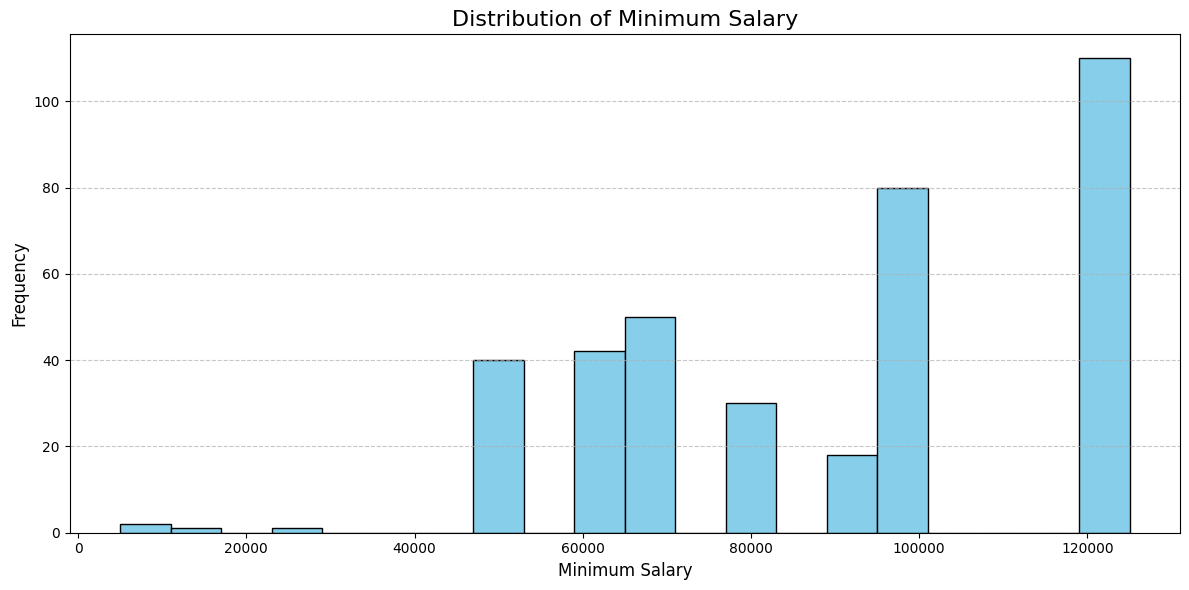

In [60]:
import matplotlib.pyplot as plt

min_salary_numeric = df[df['max_salary'] != 'Not disclosed']['max_salary'].astype(int)

min_salary_numeric = min_salary_numeric[min_salary_numeric < 150000]

# Create a histogram with customizations
plt.figure(figsize=(12, 6))  # Set figure size
plt.hist(min_salary_numeric, bins=20, color='skyblue', edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Minimum Salary', fontsize=16)
plt.xlabel('Minimum Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
- Salary vs Experience of any Company

1. Analyze Company Ratings
  - Calculate the average rating for each company
  - Identify companies with the highest and lowest average ratings.
  - Compare the distribution of ratings across different companies.
  - Calculate the total number of reviews for each company. | Sort to get most and LiteralString

- List the top 10 companies based on average rating and number of reviews.
- Analyze the characteristics and practices of these top-rated companies. | Most Popular Responsibilities of top 100 companies
